In [ ]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [ ]:
# Importing Housing.csv

housing = pd.read_csv("/content/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Converting Yes to 1 and No to 0 using map function

housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [ ]:
# Now let's see the head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status = pd.get_dummies(housing['furnishingstatus'])

In [ ]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [ ]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status dataframe.
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [ ]:
#print status
status.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [ ]:
#Adding the results to the master dataframe i.e housing
housing = pd.concat([housing, status], axis = 1)

In [ ]:
# Dropping furnishingstatus from housing data as we have created the dummies for it
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [ ]:
housing["semi-furnished"]=housing["semi-furnished"].astype(int)
housing["unfurnished"]=housing["unfurnished"].astype(int)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested you need to calculate area per bedroom
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [ ]:
# Create another new Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [ ]:
# check head of housing
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [ ]:
#defining a normalisation function
#hint use formula=(x-min(x))/(max(x) - min(x))
def normalize (x):
    # code here
    return (x-min(x))/(max(x) - min(x))



# applying normalize ( ) to all columns using apply function
housing = housing.apply(normalize)


In [ ]:
# print all housing columns available to decide which all variables will be our feature and target variable
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [ ]:
# Putting feature variable to X
X = housing.drop('price', axis = 1)
# Putting response variable to y ie. price
y = housing['price']

In [ ]:
# import test_train_split module
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing statsmodels module as sm
import statsmodels.api as sm

# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [ ]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     61.01
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.17e-95
Time:                        07:03:18   Log-Likelihood:                 418.31
No. Observations:                 436   AIC:                            -804.6
Df Residuals:                     420   BIC:                            -739.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1197      0.061     

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# write magic function matplotlib inline
%matplotlib inline

<Axes: >

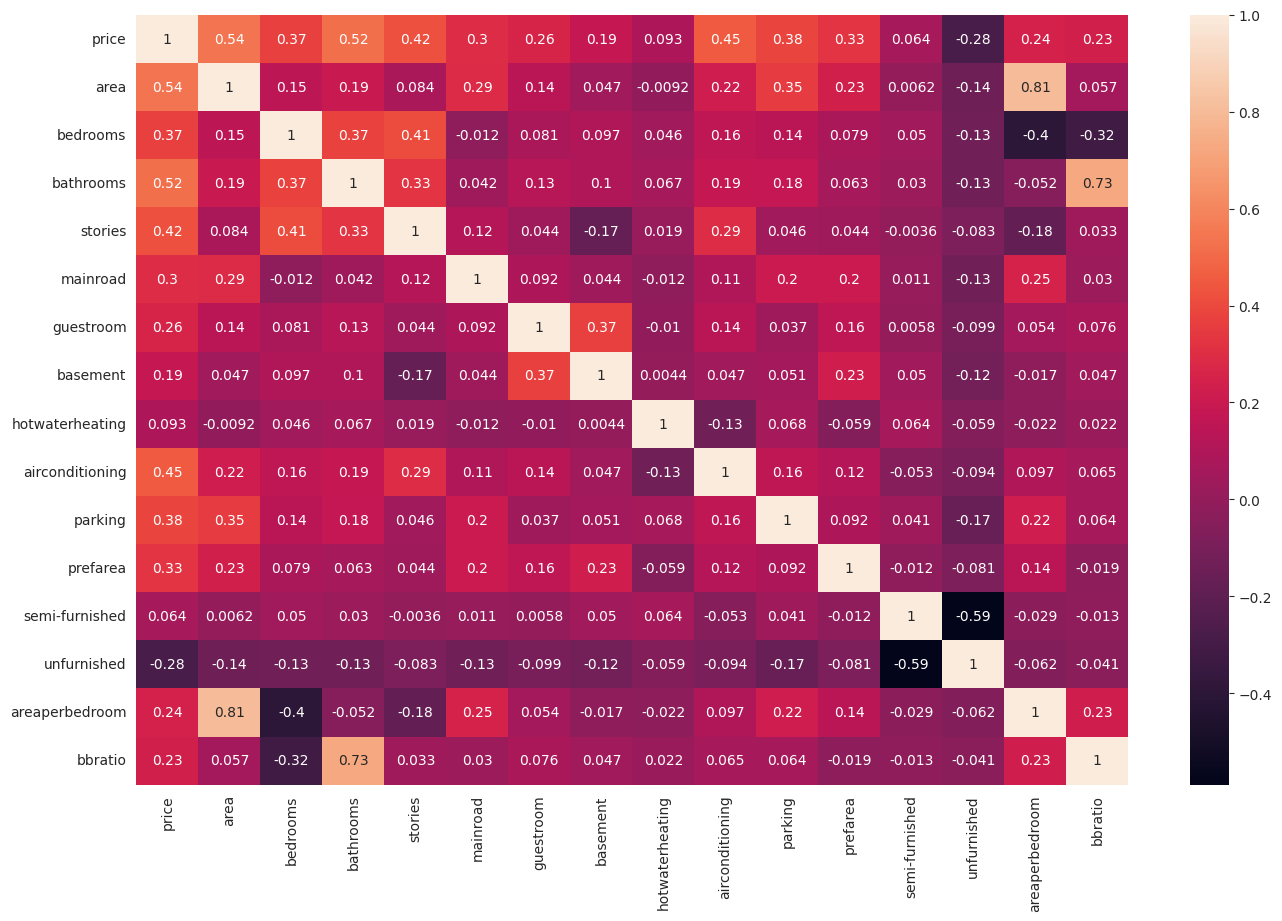

In [ ]:
# Let's see the correlation matrix on hoousing data
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True) # Generate a heatmap, annot = True to print the values inside the square




In [ ]:
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define vif_scores function as stated above
def vif_scores(input_data):
    # Check if input_data is a DataFrame or a NumPy array
    if isinstance(input_data, pd.DataFrame):
        exog = input_data.values
        columns = input_data.columns
    elif isinstance(input_data, np.ndarray):
        exog = input_data
        # For a NumPy array, generate dummy column names
        columns = [f'col_{i}' for i in range(input_data.shape[1])]
    else:
        raise TypeError("Input data must be a pandas DataFrame or a NumPy array.")

    vif_series = pd.Series([variance_inflation_factor(exog, i) for i in range(exog.shape[1])], index=columns)
    return vif_series

# print vif scores for all current input features
vif_scores(X)

,0
area,57.516048
bedrooms,10.683404
bathrooms,11.106354
stories,2.805901
mainroad,7.910522
guestroom,1.492428
basement,2.045854
hotwaterheating,1.097694
airconditioning,1.768615
parking,2.007955


In [ ]:
# Lets check vif scores again after removing bbratio from features.
vif_scores(X.drop(['bbratio'], axis = 1))

,0
area,20.716025
bedrooms,10.026456
bathrooms,1.712298
stories,2.783201
mainroad,7.459237
guestroom,1.478756
basement,2.027730
hotwaterheating,1.093564
airconditioning,1.768236
parking,2.004052


In [ ]:
# Lets check vif scores after removing bedrooms from left features.
vif_scores(X.drop(['bedrooms'], axis = 1))

,0
area,42.887512
bathrooms,10.718679
stories,2.628845
mainroad,6.982723
guestroom,1.485241
basement,1.949230
hotwaterheating,1.088908
airconditioning,1.763905
parking,2.005809
prefarea,1.506281


In [ ]:
# Lets check vif scores after removing areaperbedroom from features which are left.
vif_scores(X.drop(['areaperbedroom'], axis = 1))

,0
area,4.724485
bedrooms,8.407332
bathrooms,3.781490
stories,2.754984
mainroad,7.905669
guestroom,1.475567
basement,2.042948
hotwaterheating,1.089829
airconditioning,1.768145
parking,2.000503


In [ ]:
# Putting feature variable to X
X = housing.iloc[:, 3:13].values
# Putting response variable to y ie. price
y = housing.iloc[:, 13].values

In [ ]:
# test train split again on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Adding a constant column to our dataframe
X_train = sm.add_constant(X_train)
# Adding  constant variable to test dataframe
X_test = sm.add_constant(X_test)

# create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()


In [ ]:
#print model 2 summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     31.84
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           7.67e-46
Time:                        07:03:21   Log-Likelihood:                -172.24
No. Observations:                 436   AIC:                             366.5
Df Residuals:                     425   BIC:                             411.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8001      0.052     15.255      0.0

In [ ]:
# Making predictions
y_pred = lm_2.predict(X_test)
y_pred

array([ 0.63453219,  0.52038789,  0.02408434,  0.52812223,  0.7730677 ,
        0.44791006,  0.61148592,  0.14396499,  0.62200892,  0.41158269,
        0.51166736,  0.68457453,  0.05393546,  0.56923853,  0.08093153,
        0.80006377,  0.05393546,  0.13251022,  0.14242863,  0.53005611,
       -0.04730705,  0.44992598,  0.02408434,  0.68457453,  0.56648042,
        0.4503235 , -0.05867249, -0.11671136, -0.02103496,  0.53904274,
        0.08246789, -0.12425841,  0.32120863,  0.66152826,  0.0606013 ,
       -0.0990466 , -0.04614921,  0.05393546,  0.7115706 ,  0.54930582,
        0.41158269,  0.63396146,  0.51166736,  0.6599919 ,  0.57196658,
       -0.04039694,  0.48780871,  0.7115706 ,  0.00389312,  0.3482047 ,
        0.05547182, -0.12434546,  0.721489  ,  0.13251022,  0.66152826,
        0.56362537,  0.53866343,  0.05547182,  0.13251022,  0.63299583,
        0.61148592, -0.11382246,  0.73558249,  0.46162503,  0.75002143,
        0.54320809,  0.35023883,  0.75002143,  0.6599919 , -0.04

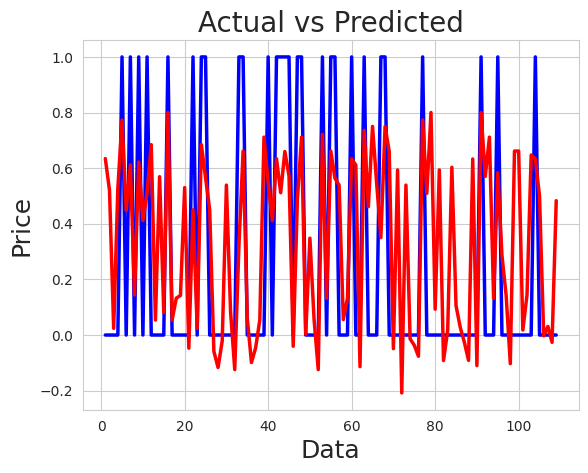

In [ ]:
# Actual vs Predicted graph as below
c = [i for i in range(1,len(y_test)+1)]
fig = plt.figure()

#Plotting Actual
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
#Plotting predicted
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")

 # Plot heading
plt.title('Actual vs Predicted', fontsize = 20)


# X-label
plt.xlabel('Data', fontsize = 18)

# Y-label
plt.ylabel('Price', fontsize = 18)

plt.show()#showing the plot

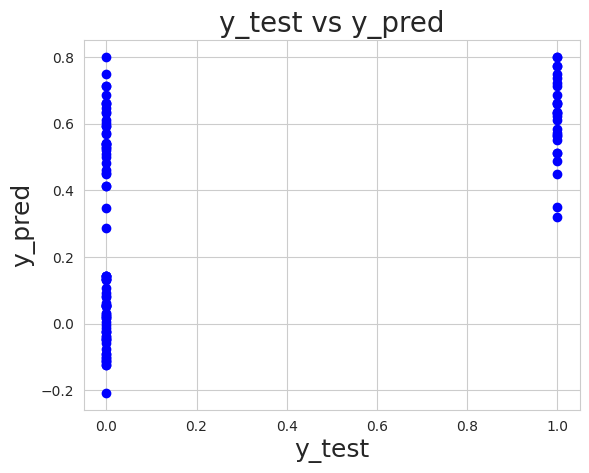

In [ ]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred, c ='blue')


# Plot heading
plt.title('y_test vs y_pred', fontsize = 20)

# X-label
plt.xlabel('y_test', fontsize = 18)

# Y-label
plt.ylabel('y_pred', fontsize = 18)

plt.show()

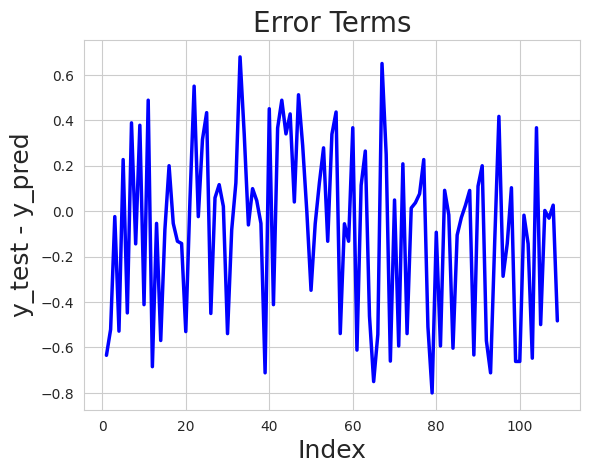

In [ ]:
# Plotting line chart of Error terms
fig = plt.figure()
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")


# Plot heading
plt.title('Error Terms', fontsize = 20)


# X-label
plt.xlabel('Index', fontsize = 18)


 # Y-label
plt.ylabel('y_test - y_pred', fontsize = 18)

plt.show()

/tmp/ipython-input-514297489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred), bins = 50)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

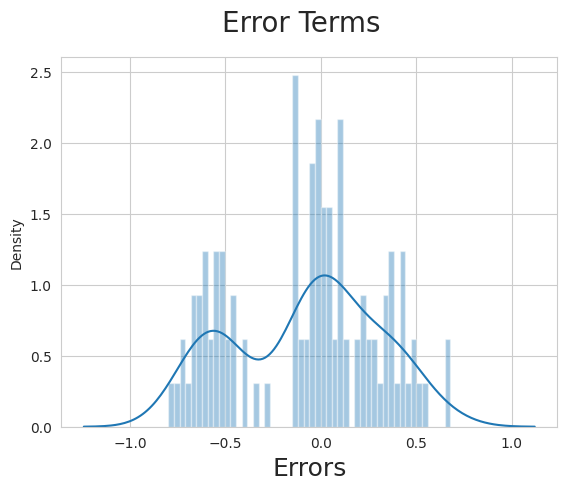

In [ ]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred), bins = 50)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt

In [ ]:
#import metrics module
from sklearn import metrics

#calculate and print RMSE
print('RMSE is: \n', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE is: 
 0.3839126248258785


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#calculate and print MSE
mse= mean_squared_error(y_test, y_pred)
print('MSE is: \n', mse)

MSE is: 
 0.14738890350069575


In [ ]:
#calculate and print MAE
mae= mean_absolute_error(y_test, y_pred)
print('MAE is: \n', mae)


MAE is: 
 0.30626044205698433


In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initializing linearRegression function
lm = LinearRegression()

# Iitialising RFE using above model
rfe = RFE(estimator=lm, n_features_to_select=10)

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train, y_train)

# Printing the boolean results for each features
print(rfe.support_)

# Printing the ranks for each features
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True  True]
[2 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Print the total no. of features in X
print(len(X[0]))

#Get column names corresponding to the features in X (before it became a numpy array for RFE)
# X was defined as housing.iloc[:, 3:13].values, so we need the column names from housing.iloc[:, 3:13]
feature_names = housing.columns[3:13]

#Get columns which are supported by RFE
col = feature_names[rfe.support_[1:]]

#Display
print(col)

10
Index(['bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished'],
      dtype='object')


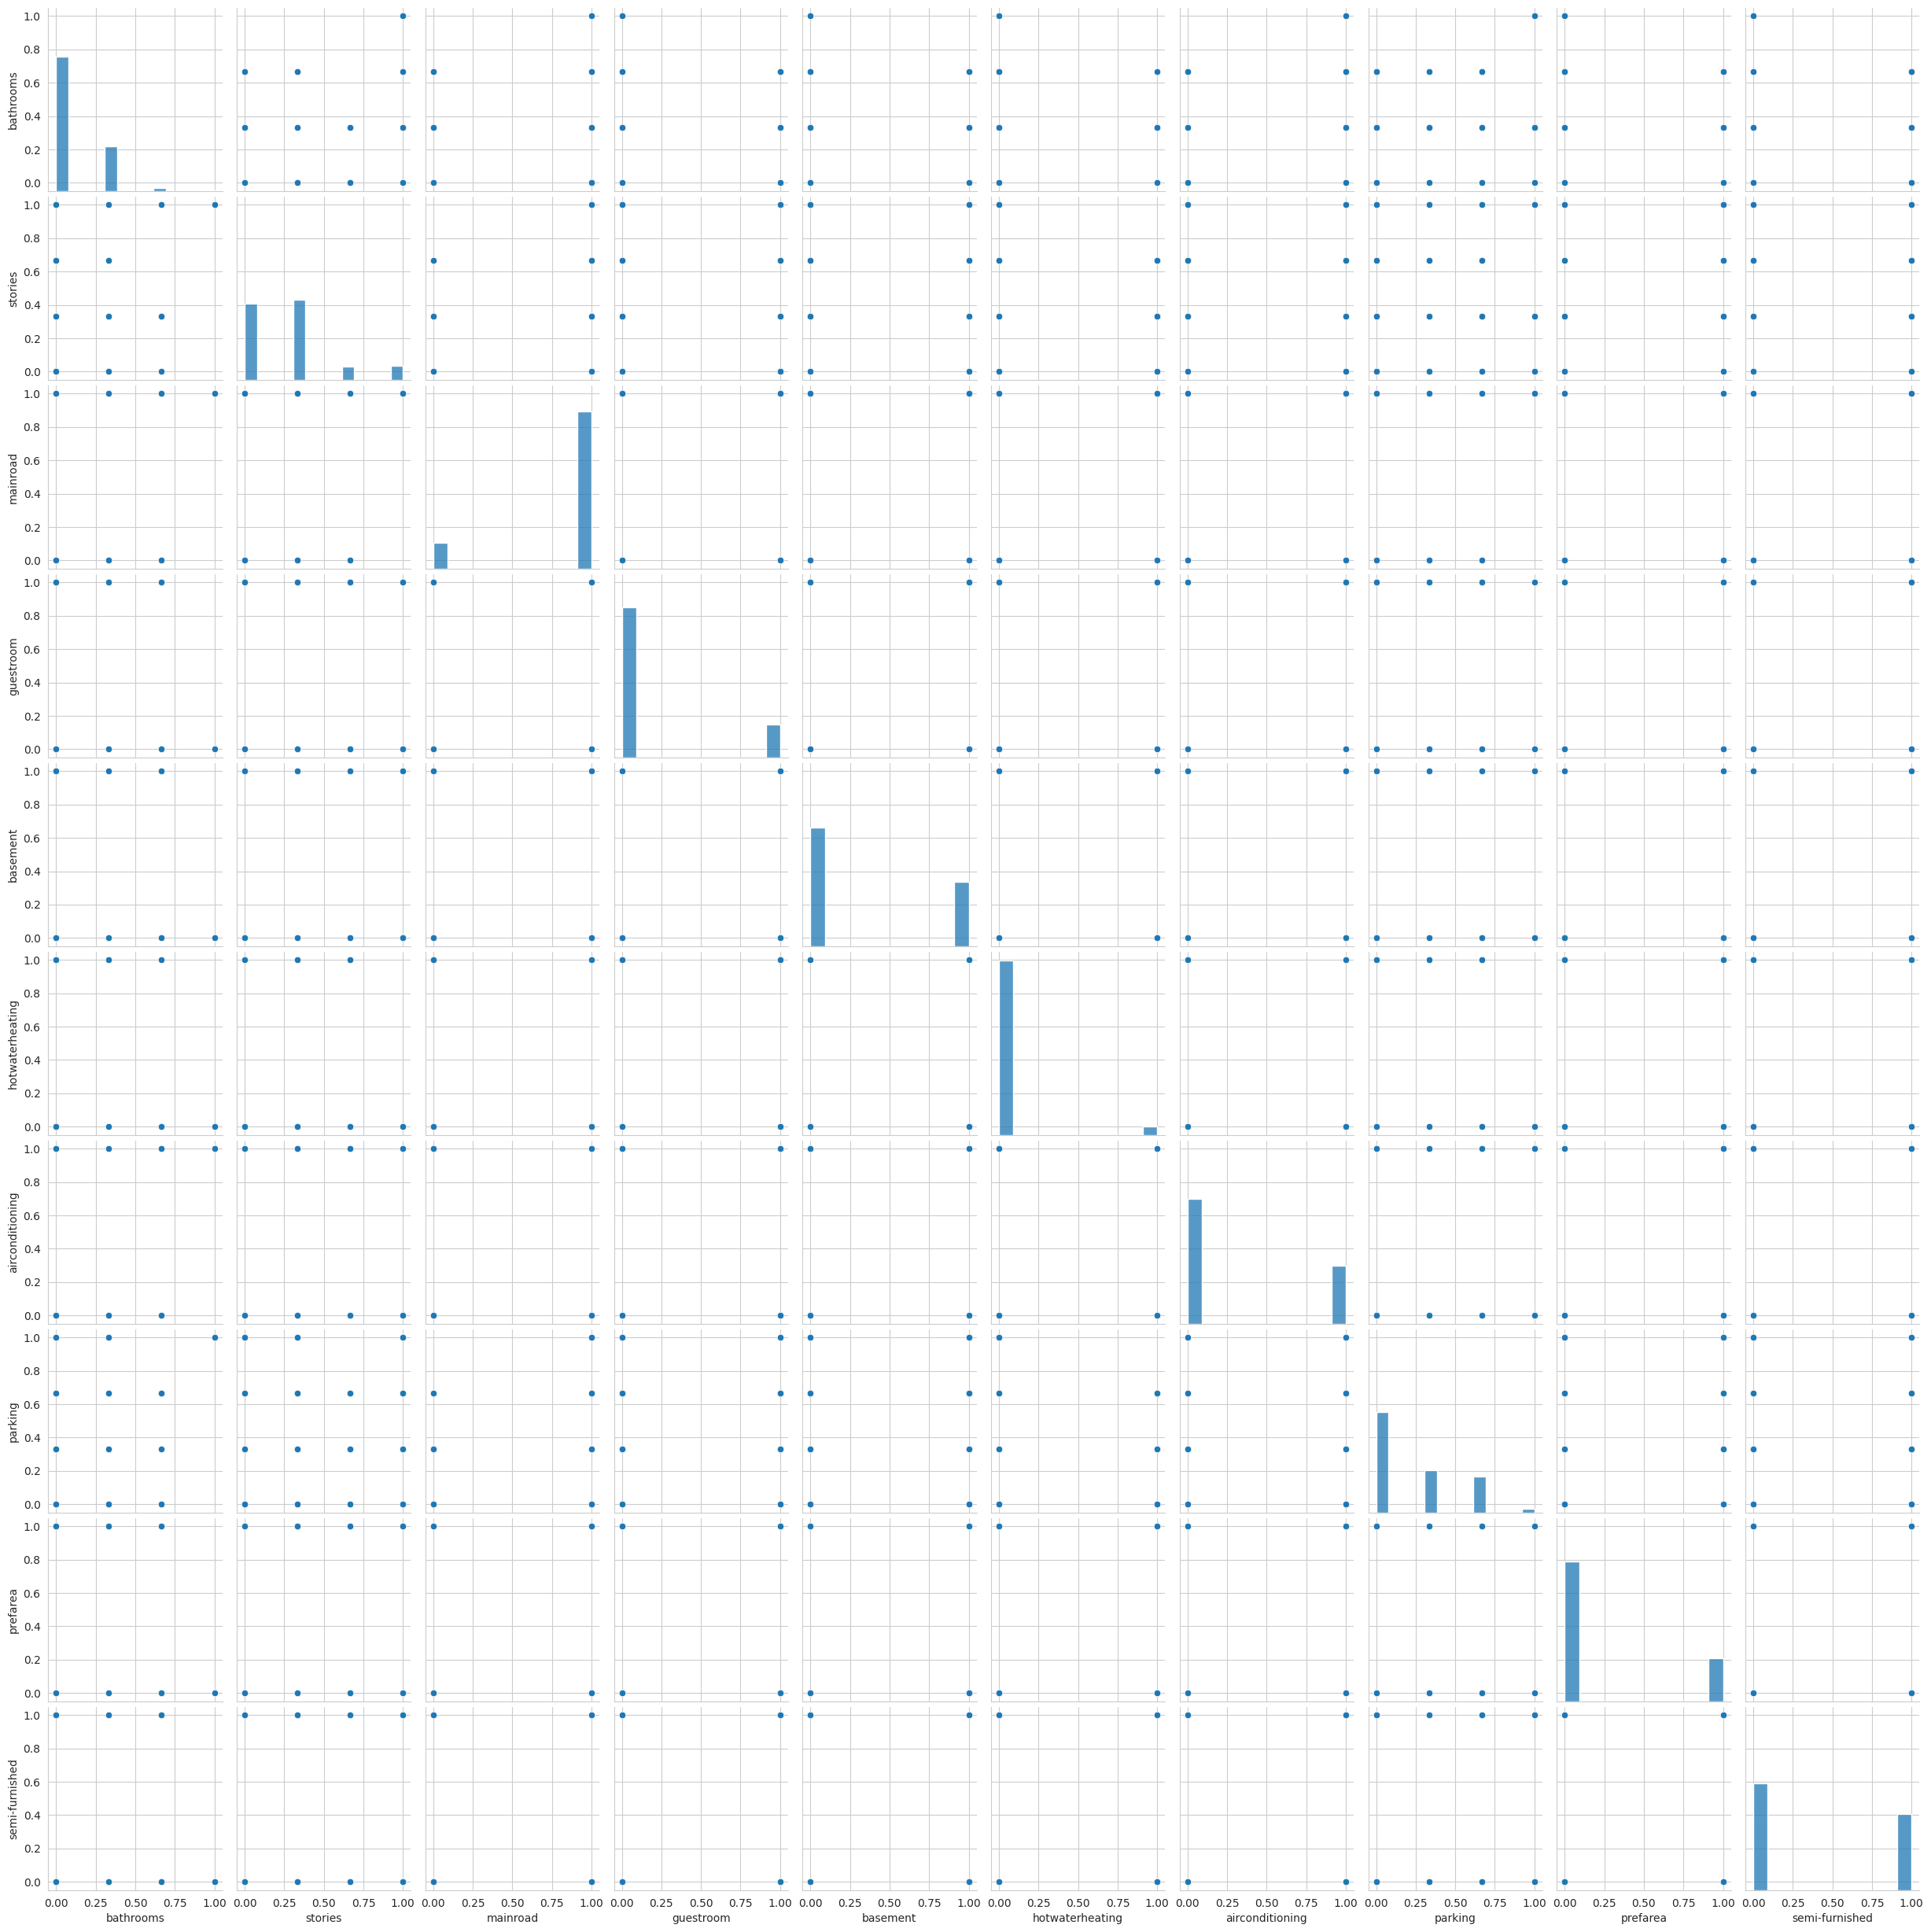

In [ ]:
# Let's plot a pair plot of all RFE selected variables in housing dataframe
sns.pairplot(housing[col])

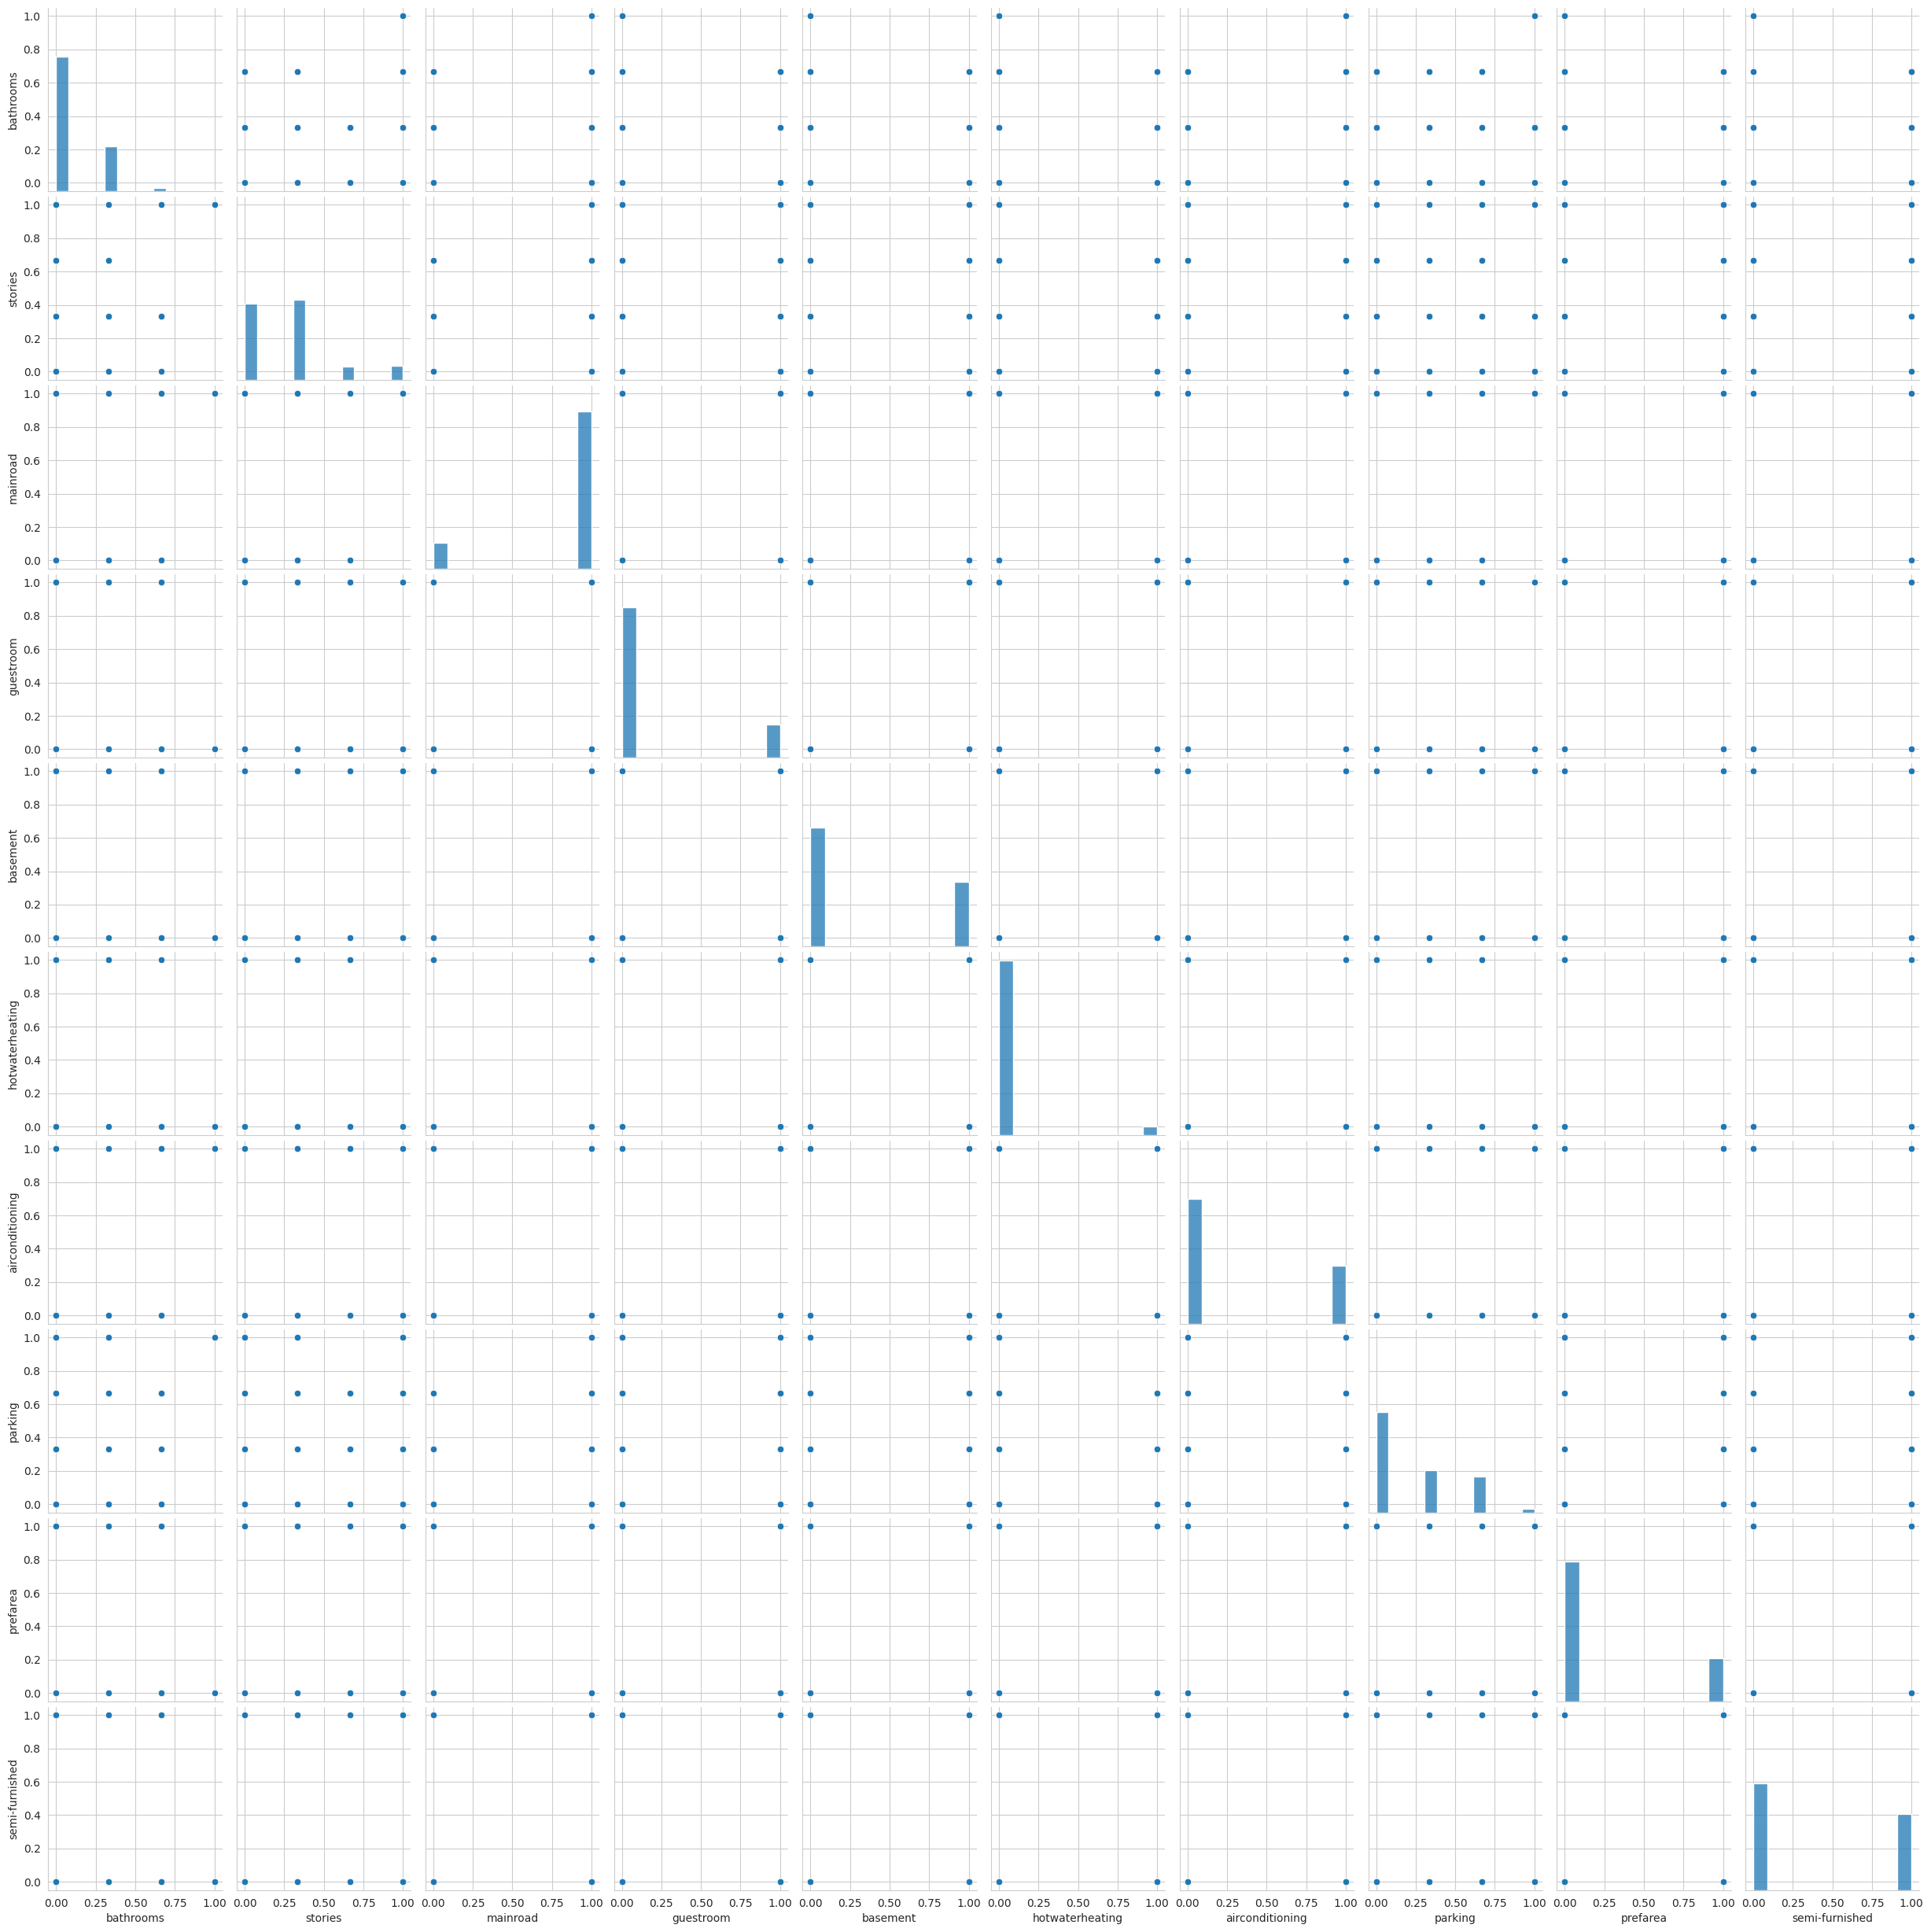

In [ ]:
# Visualise the relationship between the features and the response using scatterplots
sns.set_style(style = 'whitegrid')
sns.pairplot(housing[col])

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[:, rfe.support_]

# Adding a constant variable (since RFE did not select the original constant in this case)
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# fitting your third linear model with y_train and X_train_rfe
lm_3 = sm.OLS(y_train, X_train_rfe).fit()

In [ ]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     31.84
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           7.67e-46
Time:                        07:03:56   Log-Likelihood:                -172.24
No. Observations:                 436   AIC:                             366.5
Df Residuals:                     425   BIC:                             411.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8001      0.052     15.255      0.0

In [ ]:
# Calculating Vif scores on housing data with selected columns by RFE
vif_scores(housing[col])


,0
bathrooms,1.589693
stories,2.306895
mainroad,3.506413
guestroom,1.459935
basement,1.884687
hotwaterheating,1.085998
airconditioning,1.719338
parking,1.817363
prefarea,1.456581
semi-furnished,1.618131


In [ ]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[:, rfe.support_]

# Adding a constant variable to X_test_rfe
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm_3.predict(X_test_rfe)

Text(0.5, 1.0, 'y_test vs y_pred')

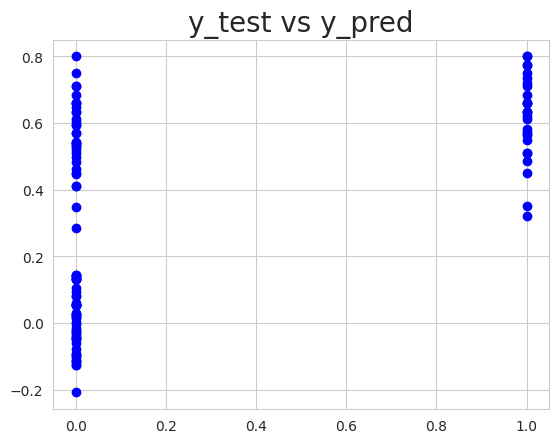

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred, c ='blue')


# Plot heading
plt.title('y_test vs y_pred', fontsize = 20)


In [ ]:
# Print RMSE, MSE and MAE scores for your third model
print('RMSE is: \n', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE is: 
 0.3839126248258785


In [ ]:
#print summary of all 3 built models
print(lm_1.summary())
print(lm_2.summary())
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     61.01
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.17e-95
Time:                        07:03:56   Log-Likelihood:                 418.31
No. Observations:                 436   AIC:                            -804.6
Df Residuals:                     420   BIC:                            -739.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1197      0.061     